Single Layer using list

In [4]:
inputs = [1, 2, 3, 2.5]

weights = [[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

layer_outputs = []

# For each neuron
for neuron_weights, neuron_bias in zip(weights, biases):
    neuron_output = 0
    for n_input, weight in zip(inputs, neuron_weights):
        neuron_output += n_input*weight ## W31*X1 + W32*X2 + W33*X3 + W34*X4
    neuron_output += neuron_bias ## ## W31*X1 + W32*X2 + W33*X3 + W34*X4 + B3
    layer_outputs.append(neuron_output)
print(layer_outputs)

[4.8, 1.21, 2.385]


Single layer using NUMPY

In [5]:
import numpy as np
inputs = np.array([1, 2, 3, 2.5])
weights = np.array([[0.2, 0.8, -0.5, 1],
					[0.5, -0.91, 0.26, -0.5],
					[-0.26, -0.27, 0.17, 0.87]])
biases = np.array([2, 3, 0.5])

layer_outputs = np.dot(weights, inputs) + biases
print(layer_outputs)

[4.8   1.21  2.385]


For batch data

In [6]:
inputs = np.array([[1.0, 2.0, 3.0, 2.5], 
          [2.0, 5.0, -1.0, 2.0], 
          [-1.5, 2.7, 3.3, -0.8]])
weights = np.array([[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]])
biases = [2.0, 3.0, 0.5]

layer_outputs = np.dot(inputs, weights.T) + biases
print(layer_outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


In [7]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

# Convert lists to numpy arrays
inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)
weights2_array = np.array(weights2)
biases2_array = np.array(biases2)

# Calculate the output of the first layer
layer1_outputs = np.dot(inputs_array, weights_array.T) + biases_array

# Calculate the output of the second layer
layer2_outputs = np.dot(layer1_outputs, weights2_array.T) + biases2_array

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


Generating non-linear data

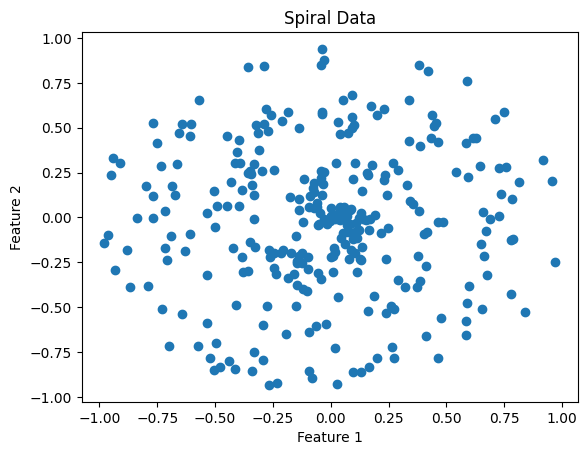

In [8]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1])  # Plot the data
plt.title("Spiral Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

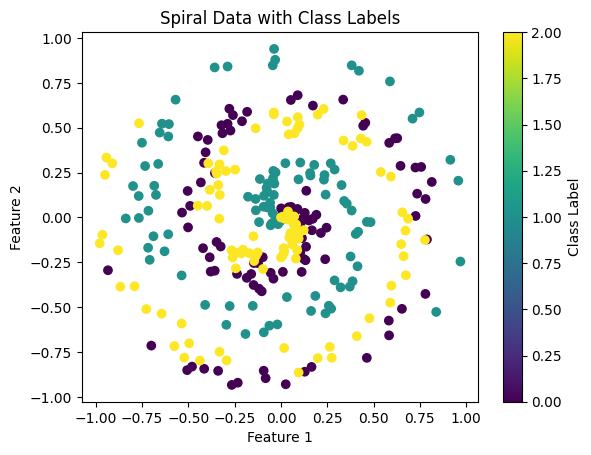

In [9]:
plt.scatter(X[:, 0], X[:, 1],c=y, cmap='viridis')  # Plot the data with colors
plt.title("Spiral Data with Class Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label='Class Label')  # Add a color bar to indicate class labels
plt.show()

Making the dense layer

In [10]:
class Dense_layer:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01*np.random.rand(n_inputs,n_neurons)
        self.biases = np.zeros((1,n_neurons))
        
    def forward(self, inputs):
        self.outputs = np.dot(inputs, self.weights) + self.biases


In [11]:
class Relu:
    def __init__(self):
        pass
    def forward(self, inputs):
        self.outputs = np.maximum(0, inputs)

class Softmax:
    def __init__(self):
        pass
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))  #keepdims=True ensures the shape is maintained for broadcasting
        self.outputs = exp_values / np.sum(exp_values, axis=1, keepdims=True)

In [16]:
# For simplicity
class loss:
    def calculate(self, outputs, y):
        samples_losses = self.forward(outputs, y)
        #calculate the mean loss across all samples
        data_loss = np.mean(samples_losses)
        return data_loss

In [17]:
class categorical_crossentropy(loss):

    def forward(self, y_true, y_pred):
        samples = len(y_true)
        # Clip predictions to prevent log(0)
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Calculate loss
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true, axis=1)
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

In [23]:
layer_1 = Dense_layer(2, 3)
layer_2 = Dense_layer(3, 3)
activation_1 = Relu()
activation_2 = Softmax()
loss_instance = categorical_crossentropy()

layer_1.forward(X)
activation_1.forward(layer_1.outputs)
layer_2.forward(activation_1.outputs)
activation_2.forward(layer_2.outputs)
losss = loss_instance.calculate(y,activation_2.outputs)

print(activation_2.outputs)  # Outputs of the final layer after softmax activation
print(np.argmax(activation_2.outputs, axis=1))  # Predicted class labels
print(losss)

[[0.33333334 0.33333334 0.33333334]
 [0.33333337 0.33333337 0.33333322]
 [0.33333343 0.33333343 0.3333331 ]
 [0.33333346 0.3333335  0.33333305]
 [0.33333352 0.33333355 0.33333287]
 [0.33333355 0.33333352 0.33333296]
 [0.33333367 0.3333337  0.33333263]
 [0.33333376 0.33333376 0.3333325 ]
 [0.3333338  0.33333382 0.33333236]
 [0.33333385 0.33333388 0.33333227]
 [0.3333339  0.33333394 0.33333215]
 [0.33333364 0.33333376 0.3333326 ]
 [0.33333382 0.33333394 0.33333224]
 [0.33333397 0.3333341  0.33333194]
 [0.33333388 0.33333403 0.33333212]
 [0.33333388 0.33333403 0.3333321 ]
 [0.33333334 0.33333346 0.33333316]
 [0.33333403 0.33333418 0.33333182]
 [0.33333373 0.3333339  0.33333236]
 [0.33333418 0.33333433 0.33333147]
 [0.3333345  0.33333457 0.33333093]
 [0.33333334 0.3333334  0.33333328]
 [0.33333334 0.33333334 0.33333334]
 [0.33333385 0.3333341  0.33333203]
 [0.33333334 0.33333334 0.33333334]
 [0.33333412 0.33333436 0.3333315 ]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33

In [28]:
class accuracy:
    def forward(self, y_true, y_pred):
        # Ensure y_true and y_pred are numpy arrays
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        # If y_true and y_pred are one-hot encoded, convert them to class labels
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        if len(y_pred.shape) == 2:
            y_pred = np.argmax(y_pred, axis=1)
        accuracy = np.mean(y_true == y_pred)
        return accuracy
accuracy_instance = accuracy()
acc = accuracy_instance.forward(y, activation_2.outputs)
print(f"Accuracy: {acc * 100:.2f}%")  # Print accuracy as a percentage

Accuracy: 30.00%
